<a href="https://colab.research.google.com/github/arnavd2001/blood-donation-sentiment/blob/main/blood_donation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/arnavd2001/blood-donation-sentiment.git

Cloning into 'blood-donation-sentiment'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [4]:
train=pd.read_csv('/content/blood-donation-sentiment/blood-train.csv')
test=pd.read_csv('/content/blood-donation-sentiment/blood-test.csv')

In [5]:
print("Shape of the Training Dataset:\n", train, "\nShape of the Testing Dataset:\n", test )


Shape of the Training Dataset:
      Unnamed: 0  Months since Last Donation  Number of Donations  \
0           619                           2                   50   
1           664                           0                   13   
2           441                           1                   16   
3           160                           2                   20   
4           358                           1                   24   
..          ...                         ...                  ...   
571         698                          23                    1   
572         433                          16                    3   
573         360                          21                    2   
574         541                          39                    1   
575          74                          72                    1   

     Total Volume Donated (c.c.)  Months since First Donation  \
0                          12500                           98   
1                    

In [6]:
#no. of columns are different in the training and the testing dataset
#testing has 5, train has 6
# in the last column of train, it has the no. of people that made a donation in March 


In [7]:
train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [8]:
#integer-location based indexing
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.
#Storing dependent variable in Y
Y=train.iloc[:,-1]
print(Y)
#we stored the last column into Y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Made Donation in March 2007, Length: 576, dtype: int64


In [9]:
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [10]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [11]:
#here we converted the train to 5 columns, which represents uniformity among train and test

In [12]:
df=pd.merge(train,test)

In [13]:
X=df.iloc[:,:]

In [14]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


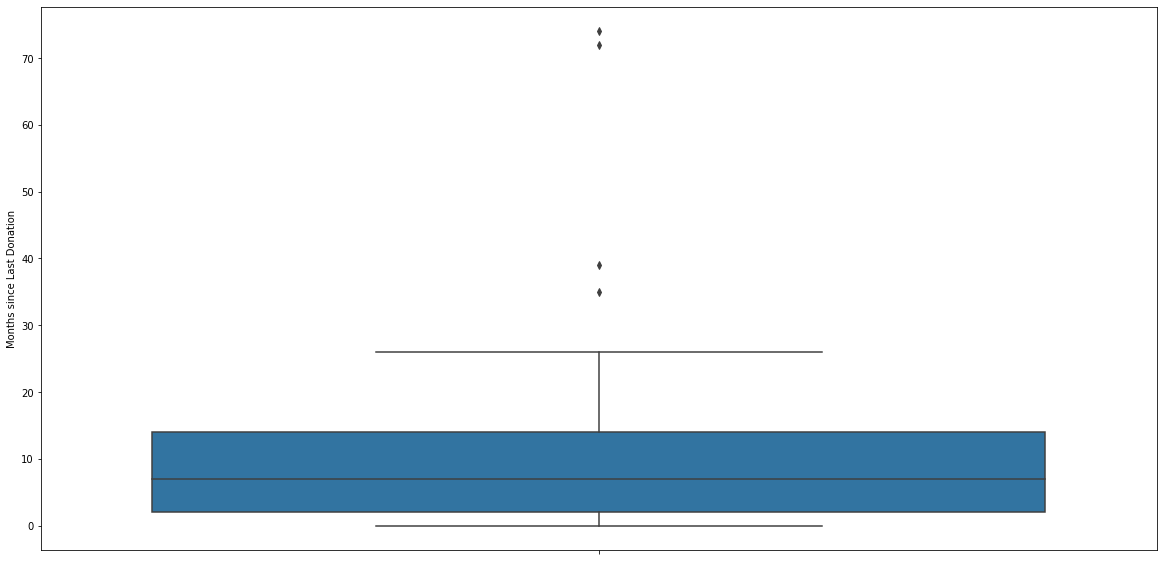

In [15]:
#Boxplot for Months since Last Donation
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=old_train)

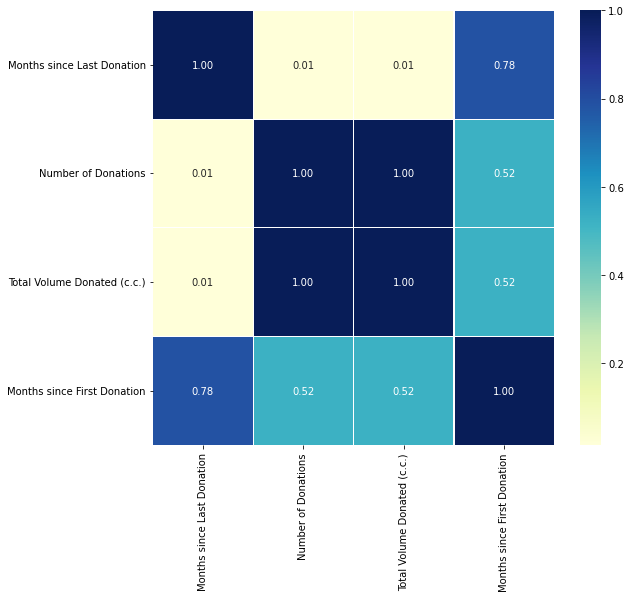

In [16]:
#Correlation between all variables [Checking how different variable are related]
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [17]:
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])
#gets updated in the 6th column

In [18]:
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


In [19]:
#Dropping the unnecessary column
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [20]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [21]:
X.shape

(810, 4)

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)

In [23]:
train=X[:576]

In [24]:
test=X[576:]
Y=Y[:576]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [32]:
#Building the model
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)
#Predicting on the test data
pred=logreg.predict(xtest)
accuracy_score(pred,ytest)

0.7155172413793104

In [33]:
#Printing the roc_auc_score
roc_auc_score(pred,ytest)

0.7321428571428571

In [38]:
### SVC classifier
SVMC = SVC(probability=True)
#Fitting the model
SVMC.fit(train,Y)
#Predicting on the test data
pred=SVMC.predict(xtest)

In [37]:
accuracy_score(pred, ytest)

0.7844827586206896

In [36]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]])

In [35]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8429487179487177

In [39]:
#Buildin the model
RFC = RandomForestClassifier()
#Fitting the model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [40]:
#Predicting the test data result
pred=RFC.predict(xtest)

In [41]:
confusion_matrix(pred,ytest)

array([[79, 27],
       [ 2,  8]])

In [42]:
accuracy_score(pred, ytest)

0.75

In [43]:
roc_auc_score(pred,ytest)

0.7726415094339623

In [44]:
#Printingthe roc auc score
roc_auc_score(pred,ytest)
#Building the model
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)
#Fitting the model
model.fit(xtrain,ytrain)
#Predicting the test data
pred=model.predict(xtest)
accuracy_score(pred, ytest)

0.7327586206896551

In [45]:
#printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 30],
       [ 1,  5]])

In [46]:
#Printing accuracy score
accuracy_score(pred,ytest)

0.7327586206896551

In [47]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.7803030303030304

In [48]:
#Building the Model
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [49]:
#Predicting from the fitted model on test data
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [50]:
#printing confusion matrix
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]])

In [51]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.7803030303030304

In [52]:
accuracy_score(pred, ytest)

0.7327586206896551